In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3


Đọc dữ liệu từ file csv

In [67]:
datas = pd.read_csv("crawled_data_ncds.csv")
datas.head()
print(datas['short_url'])

0      https://tiki.vn/product-p91612670.html?spid=91...
1      https://tiki.vn/product-p189658085.html?spid=1...
2      https://tiki.vn/product-p142545270.html?spid=1...
3      https://tiki.vn/product-p183330021.html?spid=1...
4      https://tiki.vn/product-p197216291.html?spid=1...
                             ...                        
521    https://tiki.vn/product-p258330471.html?spid=7...
522    https://tiki.vn/product-p11251711.html?spid=12...
523    https://tiki.vn/product-p11375305.html?spid=53...
524    https://tiki.vn/product-p209378509.html?spid=2...
525    https://tiki.vn/product-p32923672.html?spid=32...
Name: short_url, Length: 526, dtype: object


In [77]:
num_rows = datas.shape[0]
print(num_rows)

526


In [75]:
datas.head()

,name,price,quantitysold,brand_name,current_seller
0,Điện Thoại Oppo A54 (4GB/128GB) - Hàng Chính Hãng,3250000,5711,OPPO,Tiki Trading
1,Điện Thoại Oppo A57 (4GB/64GB) - Hàng Chính Hãng,3550000,9774,OPPO,Tiki Trading
2,Điện Thoại Oppo A16k (3GB/32GB) - Hàng Chính Hãng,2399000,22936,OPPO,Tiki Trading
3,"Apple iPad 10.2-inch (9th Gen) Wi-Fi, 2021",7090000,2354,Apple,Tiki Trading
4,Apple iPhone 14 Pro Max,27450000,2919,Apple,Tiki Trading


In [70]:
datas.drop(['short_url','image','id','selling_price','discount_rate','rating_average'],axis=1, inplace=True)

In [79]:
datas.head()

,name,price,quantitysold,brand_name,current_seller
0,Điện Thoại Oppo A54 (4GB/128GB) - Hàng Chính Hãng,3250000,5711,OPPO,Tiki Trading
1,Điện Thoại Oppo A57 (4GB/64GB) - Hàng Chính Hãng,3550000,9774,OPPO,Tiki Trading
2,Điện Thoại Oppo A16k (3GB/32GB) - Hàng Chính Hãng,2399000,22936,OPPO,Tiki Trading
3,"Apple iPad 10.2-inch (9th Gen) Wi-Fi, 2021",7090000,2354,Apple,Tiki Trading
4,Apple iPhone 14 Pro Max,27450000,2919,Apple,Tiki Trading


In [72]:
print(datas['all_time_quantity_sold'].dtypes)

KeyError: 'all_time_quantity_sold'

In [50]:
datas['all_time_quantity_sold'] = datas['all_time_quantity_sold'].astype('Int64')
datas.head(100)

,name,price,all_time_quantity_sold,brand_name,current_seller
0,Điện thoại Samsung Galaxy A54 5G (8GB/128GB) -...,8490000,23,Samsung,Tiki Trading
1,Điện Thoại Oppo A57 (4GB/64GB) - Hàng Chính Hãng,3550000,9774,OPPO,Tiki Trading
2,"Apple iPad 10.2-inch (9th Gen) Wi-Fi, 2021",7090000,2354,Apple,Tiki Trading
3,Apple iPhone 14 Pro Max,27450000,2919,Apple,Tiki Trading
4,Apple iPhone 13,16490000,5253,Apple,Tiki Trading
...,...,...,...,...,...
95,Điện Thoại Bàn Không Dây Lắp Các Loại Sim Di Đ...,550000,12,OEM,CST Telecom
96,Điện Thoại Smartphone DXD 20Pro Hàng Chính Hãng,590000,130,DXD,HƯNG LONG
97,Điện Thoại Samsung Galaxy A04e (3GB/64GB) - Hà...,2200000,12,Samsung,HAPPY PHONE
98,Điện Thoại OPPO A73 4GB/64GB - Snapdragon 662 ...,3199000,4,OPPO,THẮNG THAO MOBILE


In [73]:
filtered_data = datas[datas['brand_name'] == 'Apple']
num_rows = filtered_data.shape[0]
print(num_rows)
total_sold = filtered_data['price'].sum()
print(total_sold/num_rows)

13
16579230.76923077


Liệt kê các Thương hiệu và số sản phẩm đến từ thương hiệu đó

In [80]:
data_brand= datas['brand_name'].value_counts().to_frame()
data_brand.reset_index(inplace=True)

In [81]:
data_brand.columns = ['brand_name','count']

In [82]:
data_brand
data_brand.columns = data_brand.columns.str.strip()

connection = sqlite3.connect('C:\\Users\\nghia\\OneDrive\\Máy tính\\Python\\webcrawl\\db.sqlite3')

data_brand.to_sql('crawl_brand',connection, if_exists='replace')

47

In [83]:
numda = data_brand['count']
sum=0
for i in numda:
    sum = sum + i
print(sum)

526


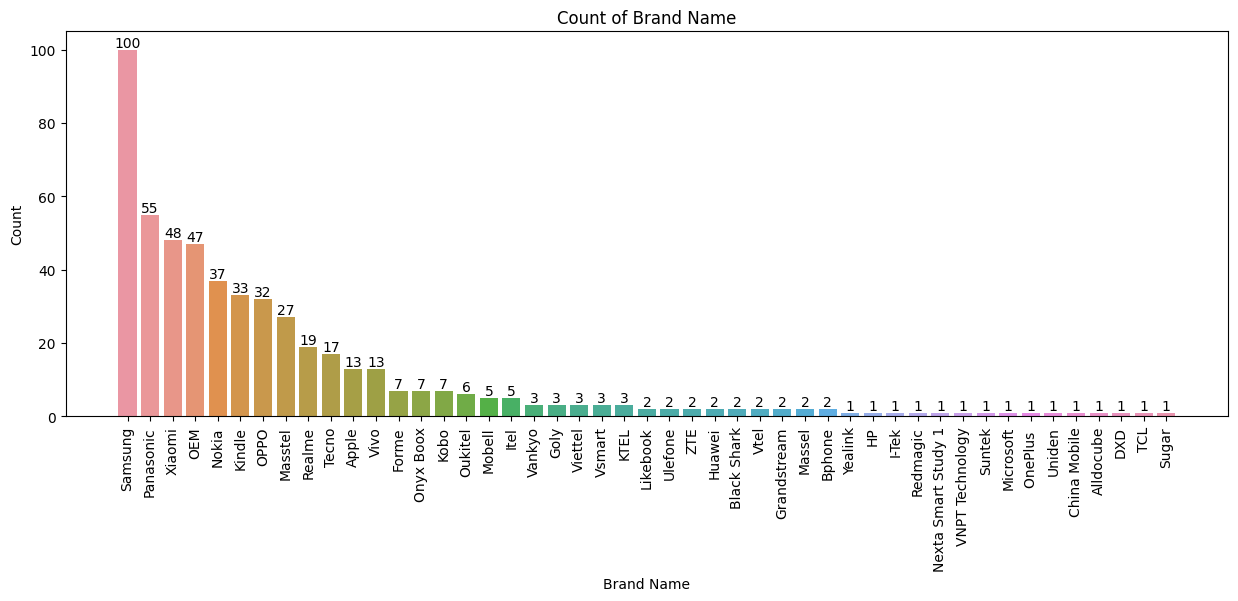

In [85]:
plt.figure(figsize=(15,5))
sns.barplot(x='brand_name', y="count",data = data_brand)
plt.xlabel("Brand Name")
plt.ylabel("Count")
plt.title("Count of Brand Name")
plt.xticks(rotation= 90)
for index, row in data_brand.iterrows():
    plt.annotate(str(row['count']), xy=(index, row['count']), ha='center', va='bottom')
plt.plot()
plt.show()


In [23]:
plt.savefig('C:\\Users\\nghia\\OneDrive\\Máy tính\\Python\\webcrawl\\crawl\\static\\images\\chart5.png')


<Figure size 640x480 with 0 Axes>

Liệt kê các Cửa hàng và số sản phẩm đến từ cửa hàng đó

In [86]:
data_name_shop= datas['current_seller'].value_counts().to_frame()
data_name_shop.reset_index(inplace=True)

In [87]:
data_name_shop

,current_seller,count
0,Tiki Trading,74
1,THẮNG THAO MOBILE,65
2,Hồng Hạnh Mobile,35
3,HAPPY PHONE,31
4,Long Hưng TechZone,29
...,...,...
67,ITEL Official Store,1
68,MÁY ĐỌC SÁCH KOBO HÀ NỘI,1
69,Alldocube Official Store,1
70,ecoking,1


In [88]:
numdas = data_name_shop['count']
sum1=0
for i in numdas:
    sum1 = sum1 + i
print(sum1)

526


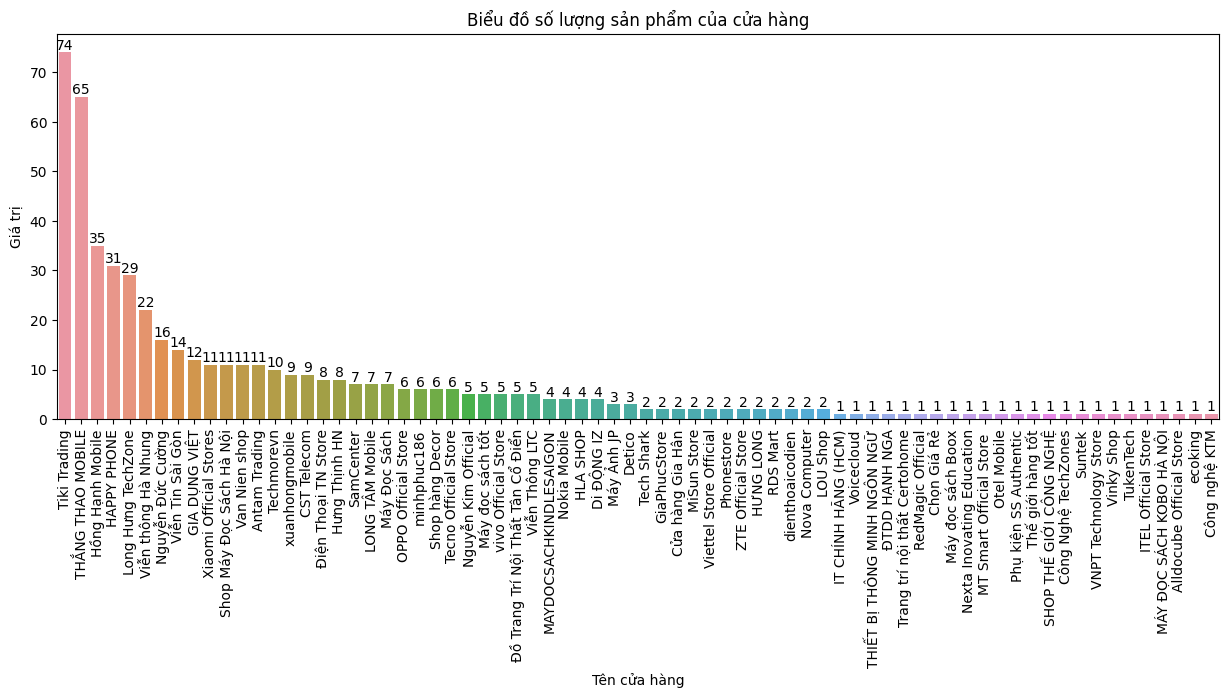

In [91]:
plt.figure(figsize=(15,5))
sns.barplot(x='current_seller', y="count",data = data_name_shop)
plt.xlabel("Tên cửa hàng")
plt.ylabel("Giá trị")
plt.title("Biểu đồ số lượng sản phẩm của cửa hàng")
plt.xticks(rotation= 90)
for index, row in data_name_shop.iterrows():
    plt.annotate(str(row['count']), xy=(index, row['count']), ha='center', va='bottom')
plt.show()

In [25]:
df1=pd.read_csv('crawled_data_ncds.csv')

df1.columns = df1.columns.str.strip()

connection = sqlite3.connect('C:\\Users\\nghia\\OneDrive\\Máy tính\\Python\\webcrawl\\db.sqlite3')

df1.to_sql('crawl_product',connection, if_exists='replace')

connection.close()